# Regressione Lineare di un dataset temporale

In [1]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

SEED = 42

In [2]:

# my_cwd = os.getcwd()
# new_dir = os.path.dirname(my_cwd)
# os.chdir(new_dir)
# os.getcwd()

In [3]:
sys.path

['h:\\My Drive\\ITS\\MarioVolpato\\Corso Forema AI_DS\\ML_PD_2324\\Lezione5\\GoldPrediction\\notebooks',
 'c:\\Users\\simon\\anaconda3\\envs\\AIDS_Base_310\\python310.zip',
 'c:\\Users\\simon\\anaconda3\\envs\\AIDS_Base_310\\DLLs',
 'c:\\Users\\simon\\anaconda3\\envs\\AIDS_Base_310\\lib',
 'c:\\Users\\simon\\anaconda3\\envs\\AIDS_Base_310',
 '',
 'c:\\Users\\simon\\anaconda3\\envs\\AIDS_Base_310\\lib\\site-packages',
 'c:\\Users\\simon\\anaconda3\\envs\\AIDS_Base_310\\lib\\site-packages\\win32',
 'c:\\Users\\simon\\anaconda3\\envs\\AIDS_Base_310\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\simon\\anaconda3\\envs\\AIDS_Base_310\\lib\\site-packages\\Pythonwin']

In [4]:

# Se la variabile "cwd" non è presente nel contesto locale
if not "my_cwd" in locals():
    # Estraggo il percorso corrente della mia directory di lavoro
    my_cwd = os.getcwd()
    # Ottieni la directory genitore della directory corrente
    parent_dir = os.path.dirname(my_cwd)
    # Imposta la directory genitore come nuova directory corrente
    my_cwd = parent_dir
    # Aggiungi la nuova directory corrente al percorso di ricerca dei moduli
    sys.path.append(my_cwd)
    # Cambia la directory corrente
    os.chdir(my_cwd)
    # Stampa il percorso della nuova directory corrente
    print(f"CWD impostata in:\n{my_cwd}")

CWD impostata in:
h:\My Drive\ITS\MarioVolpato\Corso Forema AI_DS\ML_PD_2324\Lezione5\GoldPrediction


In [5]:
import src
from src import my_functions
from src.my_functions import show_multiple_img as smi

In [6]:
import logging

# Set up the logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

# Create a file handler and set the log level
file_handler = logging.FileHandler('logfile.log')
file_handler.setLevel(logging.DEBUG)

# Create a console handler and set the log level
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)

# Create a formatter and add it to the handlers
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

# Add the handlers to the logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)

# Use the logger
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')


2024-02-09 15:09:17,060 - __main__ - INFO - This is an info message
2024-02-09 15:09:17,070 - __main__ - WARNING - This is a warning message
2024-02-09 15:09:17,074 - __main__ - ERROR - This is an error message
2024-02-09 15:09:17,076 - __main__ - CRITICAL - This is a critical message


In [7]:
my_file_name = "quotazOro10A.csv"

input_file = os.path.join(my_cwd, "input", my_file_name)

logger.info(f'Input file: {input_file}')


df = pd.read_csv(input_file)

2024-02-09 15:09:17,108 - __main__ - INFO - Input file: h:\My Drive\ITS\MarioVolpato\Corso Forema AI_DS\ML_PD_2324\Lezione5\GoldPrediction\input\quotazOro10A.csv


In [8]:
os.getcwd()

'h:\\My Drive\\ITS\\MarioVolpato\\Corso Forema AI_DS\\ML_PD_2324\\Lezione5\\GoldPrediction'

In [9]:
df.head()

,open,high,low,close,volume,timestamp,formattedOpen,formattedHigh,formattedLow,formattedClose,formattedVolume,formattedTimestamp,relatedNews,issue,redemption,highLow,peCode,newsPnacWithCsk,Date
0,29.89,30.12,29.86,30.05,0,2014-02-10T01:00:00+01:00,29.89,30.12,29.86,30.05,0,10/02/2014,NaN,0,1,[object Object],[object Object],NaN,2014-02-10
1,30.03,30.47,30.01,30.42,0,2014-02-11T01:00:00+01:00,30.03,30.47,30.01,30.42,0,11/02/2014,NaN,0,1,[object Object],[object Object],NaN,2014-02-11
2,30.44,30.68,30.30,30.54,0,2014-02-12T01:00:00+01:00,30.44,30.68,30.30,30.54,0,12/02/2014,NaN,0,1,[object Object],[object Object],NaN,2014-02-12
3,30.53,30.63,30.29,30.61,0,2014-02-13T01:00:00+01:00,30.53,30.63,30.29,30.61,0,13/02/2014,NaN,0,1,[object Object],[object Object],NaN,2014-02-13
4,30.56,31.02,30.56,30.96,0,2014-02-14T01:00:00+01:00,30.56,31.02,30.56,30.96,0,14/02/2014,NaN,0,1,[object Object],[object Object],NaN,2014-02-14


In [10]:
df.shape

(2607, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2607 non-null   float64
 1   high                2607 non-null   float64
 2   low                 2607 non-null   float64
 3   close               2607 non-null   float64
 4   volume              2607 non-null   int64  
 5   timestamp           2607 non-null   object 
 6   formattedOpen       2607 non-null   float64
 7   formattedHigh       2607 non-null   float64
 8   formattedLow        2607 non-null   float64
 9   formattedClose      2607 non-null   float64
 10  formattedVolume     2607 non-null   int64  
 11  formattedTimestamp  2607 non-null   object 
 12  relatedNews         0 non-null      float64
 13  issue               2607 non-null   int64  
 14  redemption          2607 non-null   int64  
 15  highLow             2607 non-null   object 
 16  peCode

In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
open,2607.0,NaN,NaN,NaN,42.559582,9.502709,29.38,34.785,37.79,51.15,61.21
high,2607.0,NaN,NaN,NaN,42.823533,9.573921,29.47,34.94,38.0,51.47,63.24
low,2607.0,NaN,NaN,NaN,42.305501,9.434626,29.27,34.59,37.63,50.85,60.63
close,2607.0,NaN,NaN,NaN,42.566763,9.504255,29.41,34.78,37.81,51.155,61.21
volume,2607.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
timestamp,2607,2607,2014-02-10T01:00:00+01:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
formattedOpen,2607.0,NaN,NaN,NaN,42.559582,9.502709,29.38,34.785,37.79,51.15,61.21
formattedHigh,2607.0,NaN,NaN,NaN,42.823533,9.573921,29.47,34.94,38.0,51.47,63.24
formattedLow,2607.0,NaN,NaN,NaN,42.305501,9.434626,29.27,34.59,37.63,50.85,60.63
formattedClose,2607.0,NaN,NaN,NaN,42.566763,9.504255,29.41,34.78,37.81,51.155,61.21


In [13]:
df.dtypes

open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
timestamp              object
formattedOpen         float64
formattedHigh         float64
formattedLow          float64
formattedClose        float64
formattedVolume         int64
formattedTimestamp     object
relatedNews           float64
issue                   int64
redemption              int64
highLow                object
peCode                 object
newsPnacWithCsk       float64
Date                   object
dtype: object

In [14]:
# Per le conversioni di oggetti datetime piu' complessi vedere: https://docs.python.org/3/library/datetime.html

df.Date

df.Date = pd.to_datetime(df.Date)

df.dtypes

open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
timestamp                     object
formattedOpen                float64
formattedHigh                float64
formattedLow                 float64
formattedClose               float64
formattedVolume                int64
formattedTimestamp            object
relatedNews                  float64
issue                          int64
redemption                     int64
highLow                       object
peCode                        object
newsPnacWithCsk              float64
Date                  datetime64[ns]
dtype: object

In [15]:
df = df.set_index("Date")

In [16]:
df_quotaz = df.loc[:,["open", "high", "low", "close"]]

In [17]:
df_quotaz.isna().sum().sum()

0

In [18]:
df_quotaz.index

DatetimeIndex(['2014-02-10', '2014-02-11', '2014-02-12', '2014-02-13',
               '2014-02-14', '2014-02-17', '2014-02-18', '2014-02-19',
               '2014-02-20', '2014-02-21',
               ...
               '2024-01-25', '2024-01-26', '2024-01-29', '2024-01-30',
               '2024-01-31', '2024-02-01', '2024-02-02', '2024-02-05',
               '2024-02-06', '2024-02-07'],
              dtype='datetime64[ns]', name='Date', length=2607, freq=None)

In [19]:
df_quotaz.head()

,open,high,low,close
Date,,,,
2014-02-10,29.89,30.12,29.86,30.05
2014-02-11,30.03,30.47,30.01,30.42
2014-02-12,30.44,30.68,30.30,30.54
2014-02-13,30.53,30.63,30.29,30.61
2014-02-14,30.56,31.02,30.56,30.96


In [20]:
df_quotaz.close

Date
2014-02-10    30.05
2014-02-11    30.42
2014-02-12    30.54
2014-02-13    30.61
2014-02-14    30.96
              ...  
2024-02-01    60.76
2024-02-02    60.79
2024-02-05    60.61
2024-02-06    60.86
2024-02-07    60.74
Name: close, Length: 2607, dtype: float64

<Axes: xlabel='Date', ylabel='close'>

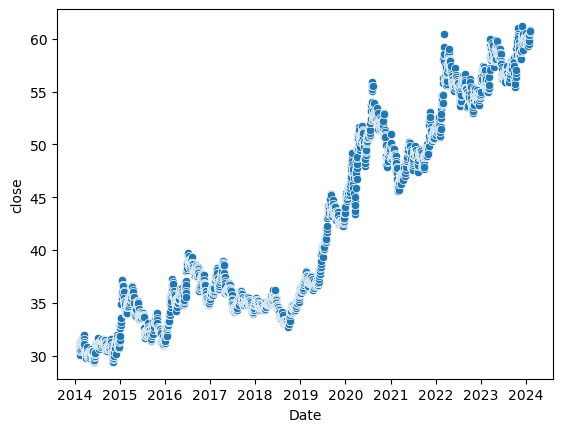

In [21]:
sns.scatterplot(x = df_quotaz.index, y = df_quotaz.close)

## Feature Engenireeng

In [22]:
df_quotaz.head()

,open,high,low,close
Date,,,,
2014-02-10,29.89,30.12,29.86,30.05
2014-02-11,30.03,30.47,30.01,30.42
2014-02-12,30.44,30.68,30.30,30.54
2014-02-13,30.53,30.63,30.29,30.61
2014-02-14,30.56,31.02,30.56,30.96


In [23]:
df_quotaz["delta"] = df_quotaz.high - df_quotaz.low
df_quotaz["mean_gold"] = (df_quotaz.open + df_quotaz.close) /2 

In [24]:
df_quotaz.head()

,open,high,low,close,delta,mean_gold
Date,,,,,,
2014-02-10,29.89,30.12,29.86,30.05,0.26,29.970
2014-02-11,30.03,30.47,30.01,30.42,0.46,30.225
2014-02-12,30.44,30.68,30.30,30.54,0.38,30.490
2014-02-13,30.53,30.63,30.29,30.61,0.34,30.570
2014-02-14,30.56,31.02,30.56,30.96,0.46,30.760


In [25]:
df_quotaz["day"] = df_quotaz.index.day
df_quotaz["month"] = df_quotaz.index.month
df_quotaz["year"] = df_quotaz.index.year

In [26]:
df_quotaz.head()

,open,high,low,close,delta,mean_gold,day,month,year
Date,,,,,,,,,
2014-02-10,29.89,30.12,29.86,30.05,0.26,29.970,10,2,2014
2014-02-11,30.03,30.47,30.01,30.42,0.46,30.225,11,2,2014
2014-02-12,30.44,30.68,30.30,30.54,0.38,30.490,12,2,2014
2014-02-13,30.53,30.63,30.29,30.61,0.34,30.570,13,2,2014
2014-02-14,30.56,31.02,30.56,30.96,0.46,30.760,14,2,2014


In [30]:
X = df_quotaz.loc[:, ["day", "month", "year"]]
y = df_quotaz.mean_gold



In [31]:
X.head()

,day,month,year
Date,,,
2014-02-10,10,2,2014
2014-02-11,11,2,2014
2014-02-12,12,2,2014
2014-02-13,13,2,2014
2014-02-14,14,2,2014


In [32]:
y

Date
2014-02-10    29.970
2014-02-11    30.225
2014-02-12    30.490
2014-02-13    30.570
2014-02-14    30.760
               ...  
2024-02-01    60.695
2024-02-02    60.775
2024-02-05    60.715
2024-02-06    60.735
2024-02-07    60.795
Name: mean_gold, Length: 2607, dtype: float64

In [33]:
X.shape, y.shape

((2607, 3), (2607,))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, train_size=.8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2085, 3), (522, 3), (2085,), (522,))

In [37]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [38]:
linear_model.coef_, linear_model.intercept_

(array([0.00739648, 0.16117046, 3.07454481]), -6164.895723910343)

In [39]:
linear_model.score(X_train, y_train)

0.8758195313386775

In [40]:
linear_model.score(X_test, y_test)

0.8718780756750811

In [41]:
y_predicted = linear_model.predict(X)

In [42]:
y_predicted

array([27.63382237, 27.64121885, 27.64861533, ..., 58.34228802,
       58.34968451, 58.35708099])

In [43]:
y

Date
2014-02-10    29.970
2014-02-11    30.225
2014-02-12    30.490
2014-02-13    30.570
2014-02-14    30.760
               ...  
2024-02-01    60.695
2024-02-02    60.775
2024-02-05    60.715
2024-02-06    60.735
2024-02-07    60.795
Name: mean_gold, Length: 2607, dtype: float64

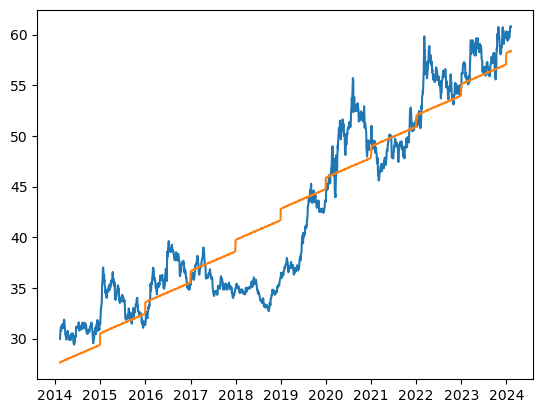

In [44]:
plt.plot(df_quotaz.index, y)
plt.plot(df_quotaz.index, y_predicted)

plt.show()

In [50]:
linear_model.predict([[10,2,2029]])

c:\Users\simon\anaconda3\envs\AIDS_Base_310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([73.75199447])

In [51]:
import joblib

In [54]:
# serializzazione

version = "00"
joblib.dump(linear_model, f"models/linear_model_{version}.bin")

['models/linear_model_00.bin']